## Práctica 1

In [10]:
import pandas as pd
data = pd.read_excel('exoplanets.xls')
data.head()
radius = pd.qcut(data['radius (m)'], q=[0, 0.25, 0.75, 1], labels=['short', 'medium', 'long'])
data['radius (m)'] = radius
mass = pd.qcut(data['mass (kg)'], q=[0, 0.25, 0.75, 1], labels=['small', 'medium', 'big'])
data['mass (kg)'] = mass
avg_temp = pd.qcut(data['avg_temp (C)'], q=[0, 0.25, 0.75, 1], labels=['cold', 'medium', 'hot'])
data['avg_temp (C)'] = avg_temp
gravity = pd.qcut(data['gravity'], q=[0, 0.25, 0.75, 1], labels=['low', 'medium', 'high'])
data['gravity'] = gravity
rotational_period = pd.qcut(data['rotational_period (h)'], q=[0, 0.25, 0.75, 1], labels=['few', 'medium', 'many'])
data['rotational_period (h)'] = rotational_period
print(data.head())
print(data.tail())



  radius (m) mass (kg) gravity atmosphere oxygene avg_temp (C) water  \
0       long       big    high        YES     YES       medium   YES   
1     medium    medium  medium         NO      NO       medium    NO   
2       long       big    high        YES     YES       medium   YES   
3       long       big    high        YES     YES       medium    NO   
4     medium    medium  medium         NO      NO         cold    NO   

  rotational_period (h) life  
0                  many   NO  
1                medium   NO  
2                   few  YES  
3                   few   NO  
4                medium   NO  
     radius (m) mass (kg) gravity atmosphere oxygene avg_temp (C) water  \
9995     medium    medium  medium         NO      NO       medium    NO   
9996     medium    medium  medium        YES     YES          hot    NO   
9997      short     small     low         NO      NO          hot    NO   
9998     medium    medium  medium         NO      NO          hot    NO   
9999  

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
target                 radius (m)  mass (kg)  gravity  atmosphere  oxygene  \
source                                                                       
radius (m)                  False       True     True       False    False   
mass (kg)                   False      False    False       False    False   
gravity                     False      False    False       False    False   
atmosphere                   True      False    False       False     True   
oxygene                     False      False    False       False    False   
avg_temp (C)                False      False    False       False    False   
water                       False      False    False        True     True   
rotational

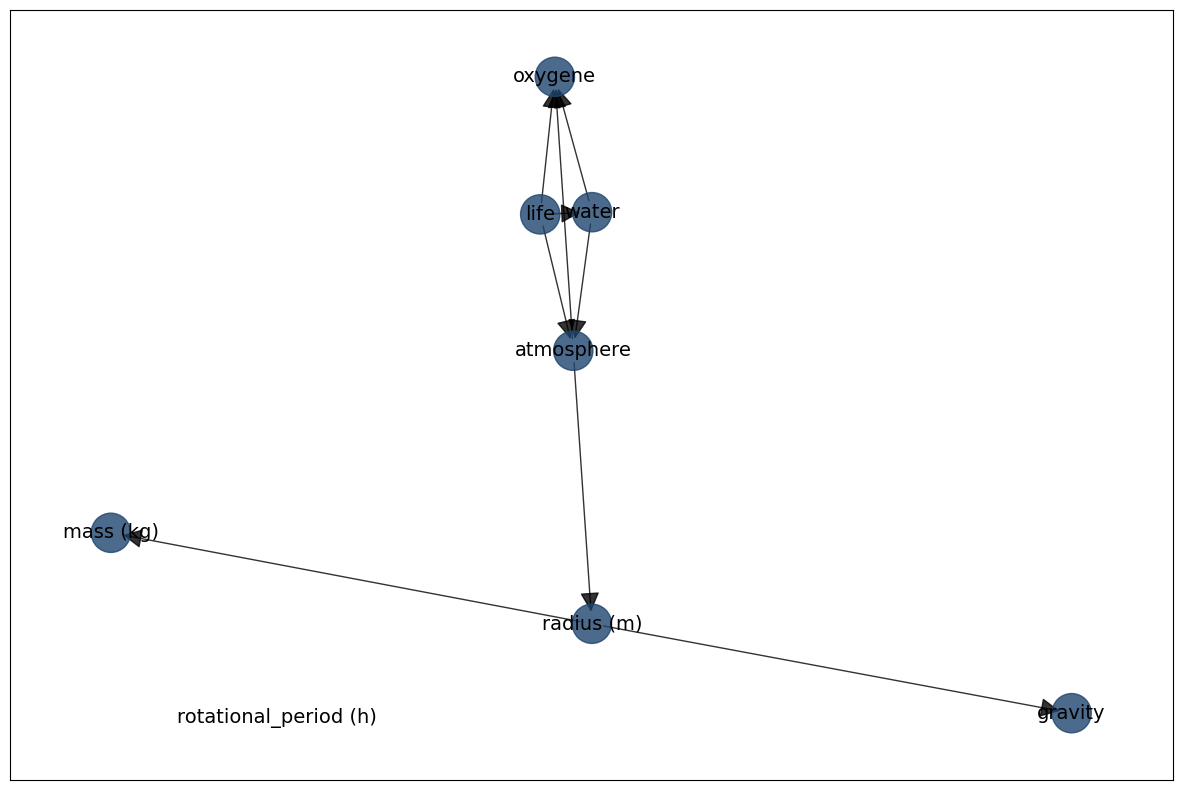

In [11]:
import bnlearn as bn
DAG = bn.structure_learning.fit(data, methodtype='hc', scoretype='bic')
bn.plot(DAG)
print(DAG['adjmat'])

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
target        mass (kg)  gravity  radius (m)  atmosphere  avg_temp (C)  \
source                                                                   
mass (kg)         False     True       False       False         False   
gravity           False    False       False        True         False   
radius (m)        False     True       False       False         False   
atmosphere        False    False       False       False          True   
avg_temp (C)      False    False       False       False         False   
oxygene           False    False       False       False         False   
water             False    False       False       False         False   
life              False    False       False       False         False   

target        oxygene  water   life  
source                               
mass (kg)       False  False  False  
gravity    

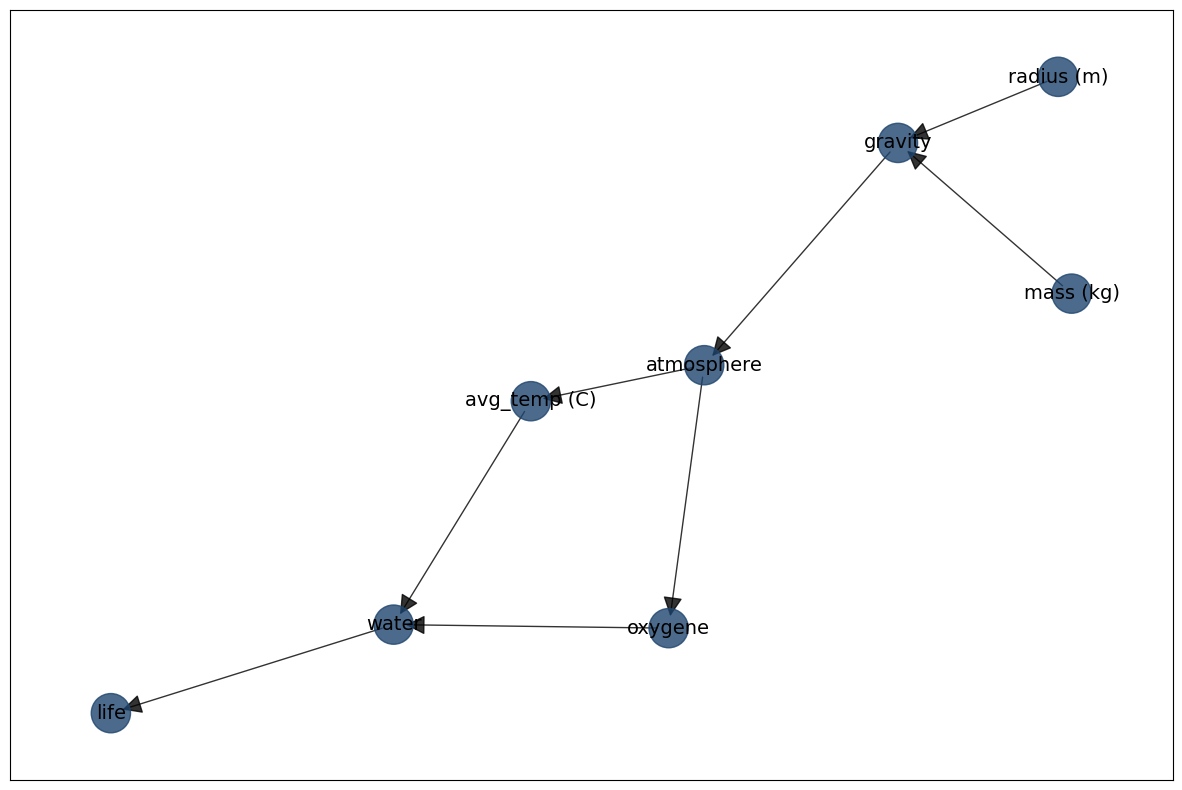

In [95]:
import bnlearn as bn
data['gravity'] = data['gravity'].astype('category').cat.reorder_categories(['low', 'medium', 'high'])
edges = [('mass (kg)', 'gravity'), ('radius (m)', 'gravity'), ('gravity', 'atmosphere'), ('atmosphere', 'avg_temp (C)'), ('atmosphere', 'oxygene'), ('oxygene', 'water'), ('avg_temp (C)', 'water'), ('water', 'life')]
DAG = bn.make_DAG(edges)
bn.plot(DAG)
print(DAG['adjmat'])

In [13]:
model = bn.parameter_learning.fit(DAG, data, methodtype='maximumlikelihood')
print(model)

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['rotational_period (h)']]
[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of mass (kg):
+-------------------+------+
| mass (kg)(big)    | 0.25 |
+-------------------+------+
| mass (kg)(medium) | 0.5  |
+-------------------+------+
| mass (kg)(small)  | 0.25 |
+-------------------+------+
[bnlearn] >CPD of gravity:
+-----------------+-----+-------------------+
| mass (kg)       | ... | mass (kg)(small)  |
+-----------------+-----+-------------------+
| radius (m)      | ... | radius (m)(short) |
+-----------------+-----+-------------------+
| gravity(high)   | ... | 0.0               |
+-----------------+-----+-------------------+
| gravity(low)    | ... | 1.0               |
+-----------------+-----+-------------------+
| gravity(medium) | ... | 0.0               |
+-----------------+-----+-------------------+
[bnlearn] >CPD of radius (m):
+--------------------+------

In [14]:
q = bn.inference.fit(model, variables=['atmosphere'], evidence={'gravity': 'low',})
print("Probabilidad de que haya atmósfera con baja gravedad:\n", q.df)
q = bn.inference.fit(model, variables=['atmosphere'], evidence={'gravity': 'high',})
print("Probabilidad de que haya atmósfera con alta gravedad:\n", q.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------------+----------+
|    |   atmosphere |        p |
+====+==============+==========+
|  0 |            0 | 0.736182 |
+----+--------------+----------+
|  1 |            1 | 0.263818 |
+----+--------------+----------+
Probabilidad de que haya atmósfera con baja gravedad:
    atmosphere         p
0           0  0.736182
1           1  0.263818
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------------+----------+
|    |   atmosphere |        p |
+====+==============+==========+
|  0 |            0 | 0.366397 |
+----+--------------+----------+
|  1 |            1 | 0.633603 |
+----+--------------+----------+
Probabilidad de que haya atmósfera con alta gravedad:
    atmosphere         p
0           0  0.366397
1           1  0.633603


In [15]:
q = bn.inference.fit(model, variables=['oxygene'], evidence={'atmosphere': 'NO',})
print("Probabilidad de que haya oxígeno sin atmósfera:\n", q.df)
q = bn.inference.fit(model, variables=['oxygene'], evidence={'atmosphere': 'YES',})
print("Probabilidad de que haya oxígeno con atmósfera:\n", q.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+-----+
|    |   oxygene |   p |
+====+===========+=====+
|  0 |         0 |   1 |
+----+-----------+-----+
|  1 |         1 |   0 |
+----+-----------+-----+
Probabilidad de que haya oxígeno sin atmósfera:
    oxygene    p
0        0  1.0
1        1  0.0
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+----------+
|    |   oxygene |        p |
+====+===========+==========+
|  0 |         0 | 0.149184 |
+----+-----------+----------+
|  1 |         1 | 0.850816 |
+----+-----------+----------+
Probabilidad de que haya oxígeno con atmósfera:
    oxygene         p
0        0  0.149184
1        1  0.850816


In [16]:
q = bn.inference.fit(model, variables=['water'], evidence={'oxygene': 'NO',})
print("Probabilidad de que haya agua sin oxigeno:\n ", q.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   water |         p |
+====+=========+===========+
|  0 |       0 | 0.952081  |
+----+---------+-----------+
|  1 |       1 | 0.0479187 |
+----+---------+-----------+
Probabilidad de que haya agua sin oxigeno:
     water         p
0      0  0.952081
1      1  0.047919


In [23]:
q = bn.inference.fit(model, variables=['life'], evidence={'water': 'NO',})
print("Probabilidad de vida en un planeta sin agua:\n ", q.df)
q = bn.inference.fit(model, variables=['life'], evidence={'water': 'YES',})
print("Probabilidad de vida en un planeta con agua:\n ", q.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   life |         p |
+====+========+===========+
|  0 |      0 | 0.964311  |
+----+--------+-----------+
|  1 |      1 | 0.0356894 |
+----+--------+-----------+
Probabilidad de vida en un planeta sin agua:
     life         p
0     0  0.964311
1     1  0.035689
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+---------+
|    |   life |       p |
+====+========+=========+
|  0 |      0 | 0.25608 |
+----+--------+---------+
|  1 |      1 | 0.74392 |
+----+--------+---------+
Probabilidad de vida en un planeta con agua:
     life        p
0     0  0.25608
1     1  0.74392


In [92]:
import random
planet = data.iloc[random.randint(0, len(data))]
print(planet["life"])
q = bn.inference.fit(model, variables=['life'], evidence={'water' : planet['water'], 'oxygene' : planet['oxygene'], 'atmosphere' : planet['atmosphere'], 'gravity' : planet['gravity'], 'avg_temp (C)' : planet['avg_temp (C)'], 'mass (kg)' : planet['mass (kg)'], 'radius (m)' : planet['radius (m)']})
df = q.df

NO
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   life |         p |
+====+========+===========+
|  0 |      0 | 0.964311  |
+----+--------+-----------+
|  1 |      1 | 0.0356894 |
+----+--------+-----------+


In [94]:
list_yes = []
list_no = []
for i in range(0, 1000):
    planet = data.iloc[i]
    q = bn.inference.fit(model, variables=['life'], evidence={'water' : planet['water'], 'oxygene' : planet['oxygene'], 'atmosphere' : planet['atmosphere'], 'gravity' : planet['gravity'], 'avg_temp (C)' : planet['avg_temp (C)'], 'mass (kg)' : planet['mass (kg)'], 'radius (m)' : planet['radius (m)']})
    df = q.df
    if planet["life"] == "YES":
        list_yes.append(df.iloc[-1]['p'])
    else:
        list_no.append(df.iloc[-1]['p'])
print("Probabilidad de vida en un planeta con agua:\n ", sum(list_yes)/len(list_yes))
print("Probabilidad de vida en un planeta sin agua:\n ", sum(list_no)/len(list_no))

NO
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+---------+
|    |   life |       p |
+====+========+=========+
|  0 |      0 | 0.25608 |
+----+--------+---------+
|  1 |      1 | 0.74392 |
+----+--------+---------+
NO
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   life |         p |
+====+========+===========+
|  0 |      0 | 0.964311  |
+----+--------+-----------+
|  1 |      1 | 0.0356894 |
+----+--------+-----------+
YES
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+---------+
|    |   life |       p |
+====+========+=========+
|  0 |      0 | 0.25608 |
+----+--------+---------+
|  1 |      1 | 0.74392 |
+----+--------+---------+
NO
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   life |         p |
+====+========+===========+
|  0 |      0 | 0.964311  |
+----+--------+----